## Visualizing categorical data

앞서 여러 시각적 표현방법을 사용해 데이터세트 안 여러 변수의 관계를 표현하였고, 주로 수치형 변수들 간의 관계를 살펴봄  
하지만 주요 변수 중 하나가 '범주형'(불연속형 그룹으로 나뉨)인 경우, 다른 접근 방식을 사용하는 것이 도움이 될 수 있음  

범주형 데이터 관련 시각화 방법  
(fig-lv `relplot()`, ax-lv `scatterplot()` , `lineplot()`와 같이 두가지 수준으로 나뉨)  


**fig-lv** `catplot()`  
**ax-lv**  
범주형 분산형 차트(Scatterplots):  
- stripplot() (with kind="strip"; 기본값)  
- swarmplot() (with kind="swarm")  

범주형 분포 플롯(distribution plots):  
- boxplot() (with kind="box")  
- violinplot() (with kind="violin")  
- boxenplot() (with kind="boxen")  

범주형 계산 플롯(estimate plots):  
- pointplot() (with kind="point")  
- barplot() (with kind="bar")  
- countplot() (with kind="count")  

답변하고자 하는 질문에 따라 사용할 플롯 결정  
통합 API를 사용해서 다양한 종류 간에 쉽게 전환하고 여러 관점에서 데이터를 볼 수 있음  
  
이 튜토리얼에서는 주로 fig-lv 인터페이스인 catplot()에 초점을 맞춤  

## Categorical scatterplots

catplot()의 플롯 : scatterplots  
범주형 데이터를 산점도로 표현할 때 한 범주에 속하는 모든 점이 범주형 변수에 해당하는 축을 따라 같은자리에 일직선으로 위치해야 하는 주요 문제를 해결하기 위해 서로 다른 접근 방식을 취함  
stripplot()의 접근 방식: 소량의 임의 '지터(jitter)'를 사용하여 범주형 축에서 점의 위치 조정

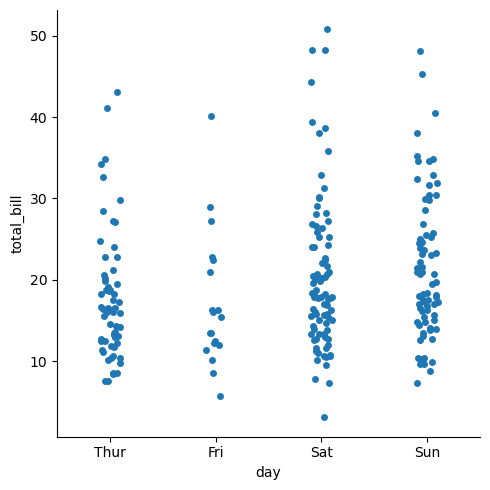

In [1]:
import seaborn as sns

tips = sns.load_dataset("tips")
sns.catplot(data=tips, x="day", y="total_bill")

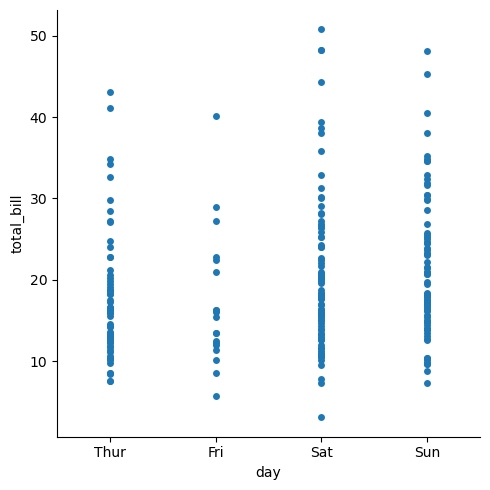

In [2]:
# 지터 파라미터로 지터의 크기를 제어하거나 지터를 완전히 비활성화할 수 있음:
sns.catplot(data=tips, x="day", y="total_bill", jitter=False)

두 번째 접근 방식은 중첩을 방지하는 알고리즘을 사용하여 범주형 축을 따라 점을 조정합니다. 
상대적으로 작은 데이터 집합에서만 잘 작동하지만 관찰 분포를 더 잘 나타낼 수 있습니다. 
이러한 종류의 플롯을 "벌집형"이라고도 하며, catplot()에서 kind="swarm"을 설정하여 활성화하는 swarmplot()을 통해 그려집니다:

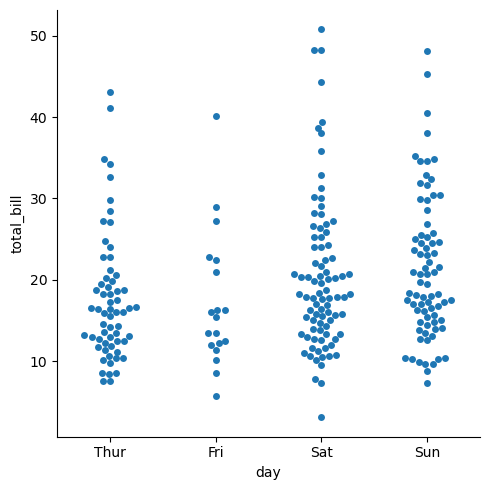

In [3]:
#중첩을 방지하는 알고리즘을 사용하여 범주형 축을 따라 점을 조정
#상대적으로 작은 데이터 집합에서만 잘 작동하지만 관찰 분포를 더 잘 나타낼 수 있음
# '벌집형(beeswarm)' 플롯이라고도 부름
sns.catplot(data=tips, x="day", y="total_bill", kind="swarm")

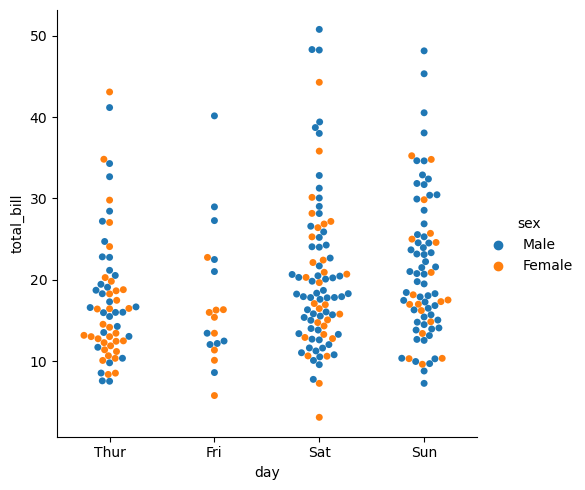

In [4]:
# 색조 시맨틱을 사용하여 범주형 플롯에 다른 차원을 추가할 수 있음
# (범주형 플롯은 현재 크기 또는 스타일 시맨틱은 지원하지 않음) 
# 범주형 플롯 함수마다 색조 시맨틱을 다르게 처리
# 분산형 차트의 경우 포인트의 색만 변경하면 됩니다:
sns.catplot(data=tips, x="day", y="total_bill", hue="sex", kind="swarm")

범주형 변수 정렬은 항상 명확하지 않으나 범주의 순서를 유추하려고 시도함  
데이터에 pandas 범주형 데이터 유형이 있을 경우 범주의 기본 순서 설정 가능  
범주형 축에 전달된 변수가 숫자로 표시되는 경우 정렬됨  
그러나 데이터는 여전히 범주형 데이터로 취급됨  

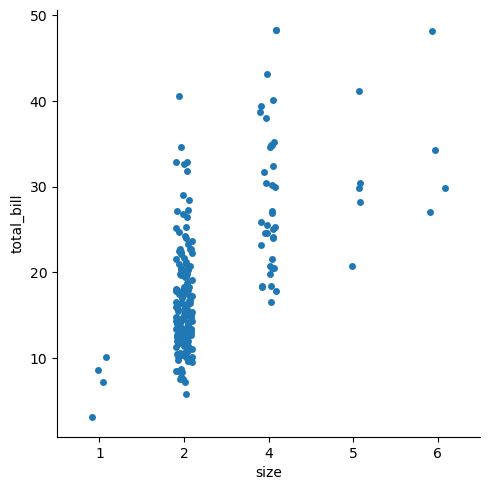

In [5]:
sns.catplot(data=tips.query("size != 3"), x="size", y="total_bill")

카테고리의 수준 사용  
순서 매개변수를 사용하여 플롯별로 순서 제어 가능
이는 한 그림에 여러 범주형 플롯을 그릴 때 중요할 수 있음:

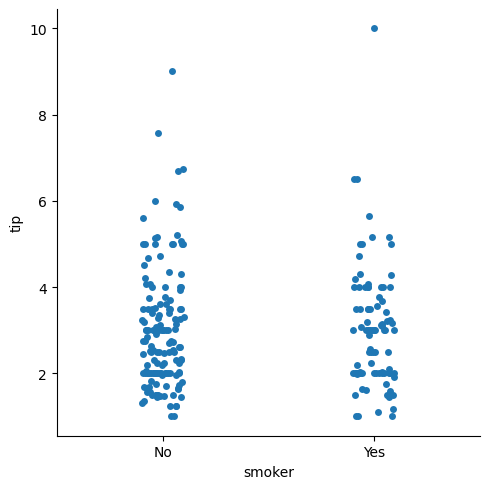

In [6]:
sns.catplot(data=tips, x="smoker", y="tip", order=["No", "Yes"])

'범주형 축'= 그림 내 가로 축  
범주 이름이 비교적 길거나 카테고리가 많은 경우 세로로 배치하는게 나을 수 있음

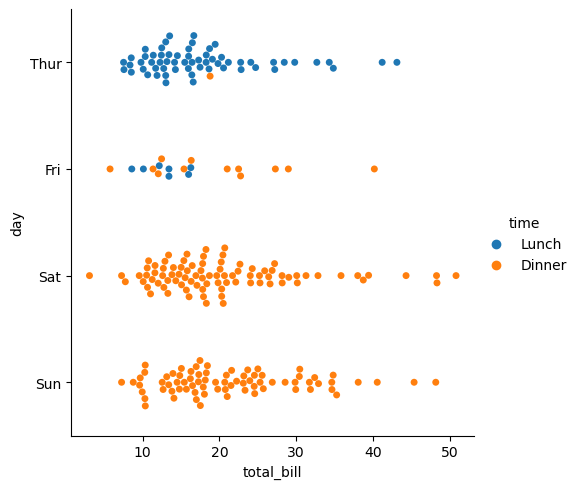

In [7]:
sns.catplot(data=tips, x="total_bill", y="day", hue="time", kind="swarm")